# Fitting routines

For all methods, the underlying package LMFIT handles the parabolic error calculations and passes along the optimization assignment to SciPy.

## Chisquare method

When fitting with the chisquare method, the costfunction to be minimized is

$$\chi^2 = \left(\frac{y_i-HFS(x_i)}{\sigma_i}\right)^2$$

with the subscript *i* referring to the datapoint, and *HFS* to the response of the :class:`.HFSModel` class. The algorithm used is the Levenberg-Marquardt algorithm, which gives quick results in a reliable fashion. The :func:`.fitting.chisquare_model` function creates the costfunction used for counting data. The function :func:`.fitting.chisquare_fit` performs the actual fit, while :func:`.fitting.chisquare_spectroscopic_fit` calculates the uncertainty on the data by taking the square root of the number of counts.

One of the options for :func:`.fitting.chisquare_model` is the argument *func*. If the square root function is given, the uncertainty is calculated by taking the square root of the *fitvalue*, not the datapoint. This approach mimics the use of the Poisson distribution instead of the Gaussian distribution for the uncertainty calculation.

In order to demonstrate the fit functions, toy data is needed. This is created by assuming some parameters for the basemodel, calculating the response, and then adding random noise.

C:\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
Chisquare fitting done: 96it [00:00, 711.07it/s]                       


True
Tolerance seems to be too small.

Scaled errors estimated from covariance matrix.
NDoF: 191, Chisquare: 243.70943, Reduced Chisquare: 1.2759656
[[Variables]]
    FWHMG:         12.2505546 +/- 2.776466 (22.66%) (init= 12.25163)
    FWHML:         7.54444319 +/- 2.544660 (33.73%) (init= 7.543783)
    TotalFWHM:     16.7770681 +/- 1.394659 (8.31%)  == '0.5346*FWHML+(0.2166*FWHML**2+FWHMG**2)**0.5'
    Scale:         96.8951275 +/- 6.935489 (7.16%) (init= 96.89334)
    Saturation:    0 (fixed)
    Amp0__1:       0.2380726 (fixed)
    Amp1__1:       0.1786341 (fixed)
    Amp1__2:       0.535743 (fixed)
    Amp2__1:       0.01191064 (fixed)
    Amp2__2:       0.1786448 (fixed)
    Amp2__3:       1 (fixed)
    Al:            99.0223550 +/- 1.029561 (1.04%) (init= 99.02318)
    Au:            199.356040 +/- 0.629877 (0.32%) (init= 199.3564)
    Bl:            101.393727 +/- 0.692640 (0.68%) (init= 101.3934)
    Bu:            200.771492 +/- 1.111849 (0.55%) (init= 200.7717)
    Cl:       

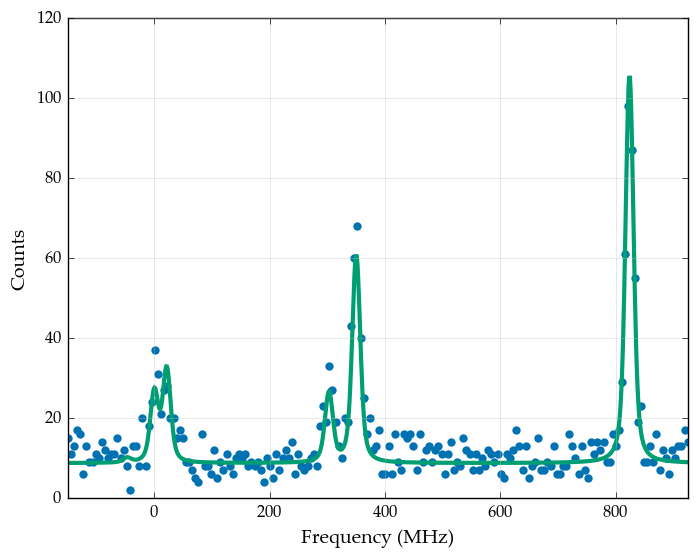

(<matplotlib.figure.Figure at 0xb4e7a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb5aff98>)

In [1]:
%matplotlib inline

import satlas as s
import numpy as np
np.random.seed(0)  #Ensure the same random numbers each time

I = 1.0
J = [1.0, 2.0]

ABC = [100, 200, 100, 200, 0, 0]
fwhm = [10, 10]
centroid = 500
scale = 100

basemodel = s.HFSModel(I, J, ABC, centroid, fwhm=fwhm, scale=scale, background_params=[10], use_saturation=False, use_racah=True)

frequency_range = (min(basemodel.locations) - 100, max(basemodel.locations) + 100)
frequency_range = np.linspace(frequency_range[0], frequency_range[1], 200)

data = np.floor(basemodel(frequency_range) + basemodel(frequency_range)**0.5 * np.random.randn(len(frequency_range)))

success, message = s.chisquare_spectroscopic_fit(basemodel, frequency_range, data)
print(success)
print(message)
print('')
basemodel.display_chisquare_fit(show_correl=False)
basemodel.plot(x=frequency_range, y=data)

If *func=np.sqrt* is supplied, the result is

Chisquare fitting done: 126it [00:00, 818.13it/s]                      


True
Tolerance seems to be too small.

Scaled errors estimated from covariance matrix.
NDoF: 191, Chisquare: 204.74572, Reduced Chisquare: 1.0719671
[[Variables]]
    FWHMG:         11.4052928 +/- 2.725368 (23.90%) (init= 11.40556)
    FWHML:         8.04020632 +/- 2.450075 (30.47%) (init= 8.040089)
    TotalFWHM:     16.3017435 +/- 1.350493 (8.28%)  == '0.5346*FWHML+(0.2166*FWHML**2+FWHMG**2)**0.5'
    Scale:         97.0923217 +/- 6.671103 (6.87%) (init= 97.09159)
    Saturation:    0 (fixed)
    Amp0__1:       0.2380726 (fixed)
    Amp1__1:       0.1786341 (fixed)
    Amp1__2:       0.535743 (fixed)
    Amp2__1:       0.01191064 (fixed)
    Amp2__2:       0.1786448 (fixed)
    Amp2__3:       1 (fixed)
    Al:            98.4456970 +/- 0.927711 (0.94%) (init= 98.44472)
    Au:            199.024103 +/- 0.568696 (0.29%) (init= 199.0234)
    Bl:            101.250852 +/- 0.636955 (0.63%) (init= 101.2501)
    Bu:            200.908034 +/- 0.963296 (0.48%) (init= 200.9071)
    Cl:       

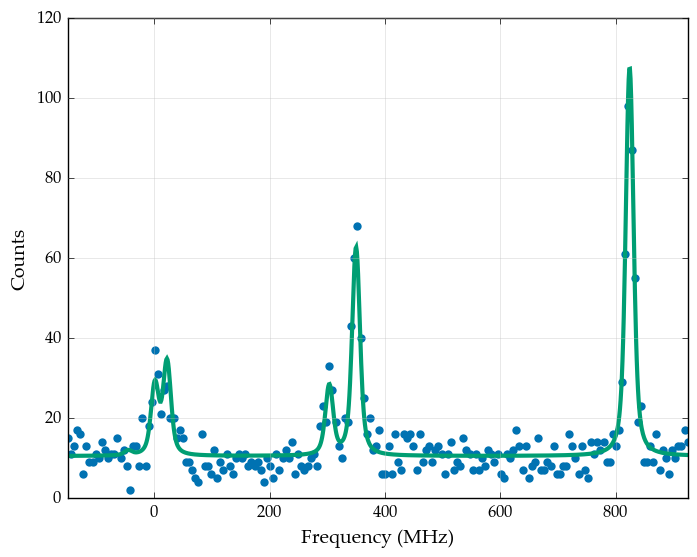

(<matplotlib.figure.Figure at 0xc2000b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc2082e8>)

In [2]:
basemodel = s.HFSModel(I, J, ABC, centroid, fwhm=fwhm, scale=scale, background_params=[10], use_saturation=False, use_racah=True)
success, message = s.chisquare_spectroscopic_fit(basemodel, frequency_range, data, func=np.sqrt)
print(success)
print(message)
print('')
basemodel.display_chisquare_fit(show_correl=False)
basemodel.plot(x=frequency_range, y=data)

which is slightly different.
## Maximum Likelihood Estimation
The Maximum Likelihood Estimation (MLE) can be used to derive the chisquare method in the case of Gaussian uncertainties. When this is not the case (as it is for counting data, which has a Poisson distribution), a less simplified method has to be used.

The MLE method works by minimizing the negative loglikelihood. This is calculated as

$$-\mathcal{L}\left(\vec{\theta}\middle|x, y, \sigma\right) = \sum_i logp\left(\vec{\theta}\middle|x_i, y_i, \sigma_i\right)$$

For the function *logp*, the standard choice is the loglikelihood derived from the Poisson distribution.

To use this method, the fitting routine code has to be changed to

Likelihood fitting done: 434it [00:00, 850.93it/s]                        


True Optimization terminated successfully.
[[Variables]]
    FWHMG:         10.7541468 (init= 10.70806)
    FWHML:         8.61348269 (init= 8.705107)
    TotalFWHM:     16.0817743  == '0.5346*FWHML+(0.2166*FWHML**2+FWHMG**2)**0.5'
    Scale:         98.1004112 (init= 98.00073)
    Saturation:    0 (fixed)
    Amp0__1:       0.2380726 (fixed)
    Amp1__1:       0.1786341 (fixed)
    Amp1__2:       0.535743 (fixed)
    Amp2__1:       0.01191064 (fixed)
    Amp2__2:       0.1786448 (fixed)
    Amp2__3:       1 (fixed)
    Al:            98.6119935 (init= 98.63549)
    Au:            199.114212 (init= 199.1435)
    Bl:            101.382229 (init= 101.4291)
    Bu:            200.982154 (init= 201.0038)
    Cl:            0 (fixed)
    Cu:            0 (fixed)
    Centroid:      499.846731 (init= 499.8283)
    Background0:   9.94373112 (init= 9.936184)
    N:             0 (fixed)


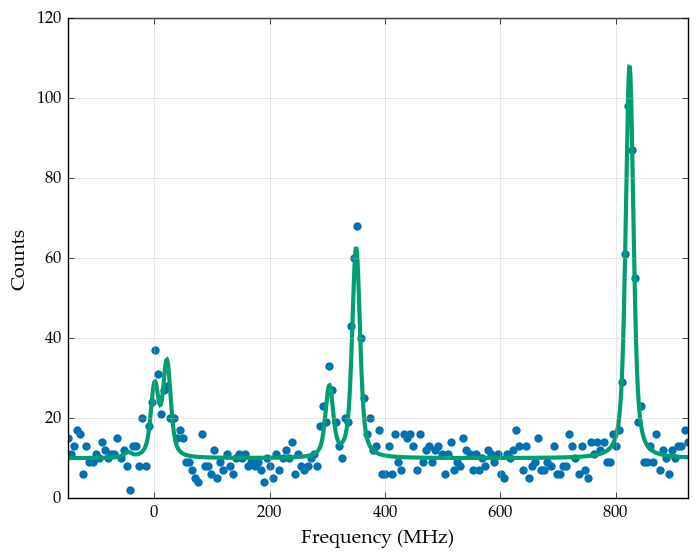

(<matplotlib.figure.Figure at 0xbeebc18>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc1bdf98>)

In [3]:
basemodel = s.HFSModel(I, J, ABC, centroid, fwhm=fwhm, scale=scale, background_params=[10], use_saturation=False, use_racah=True)
success, message = s.likelihood_fit(basemodel, frequency_range, data)
print(success, message)
basemodel.display_mle_fit(show_correl=False)
basemodel.plot(x=frequency_range, y=data)